<a href="https://colab.research.google.com/github/Ananya2803/MLCoE_TASK-2/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/50_Startups.csv')
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,38.000000,32.000000,50.000000,50.000000
mean,84471.755526,124460.951250,211025.097800,112012.639200
std,47140.937802,24360.580496,122290.310726,40306.180338
min,0.000000,51743.150000,0.000000,14681.400000
25%,65716.990000,113049.002500,129300.132500,90138.902500
50%,82404.585000,125604.625000,212716.240000,107978.190000
75%,120392.700000,145190.700000,299469.085000,139765.977500
max,165349.200000,157693.920000,471784.100000,192261.830000


In [ ]:
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')


There are  50 rows and  5 columns in the dataset.


In [ ]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        38 non-null     float64
 1   Administration   32 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
c = dataset.corr()
c

<ipython-input-8-38da35215f09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = dataset.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.162234,0.745607,0.976569
Administration,0.162234,1.000000,-0.024572,0.131789
Marketing Spend,0.745607,-0.024572,1.000000,0.747766
Profit,0.976569,0.131789,0.747766,1.000000


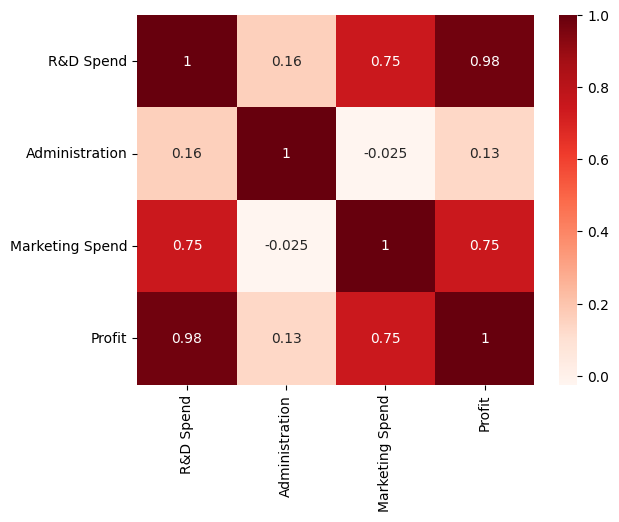

In [ ]:
sns.heatmap(c,annot=True,cmap='Reds')
plt.show()

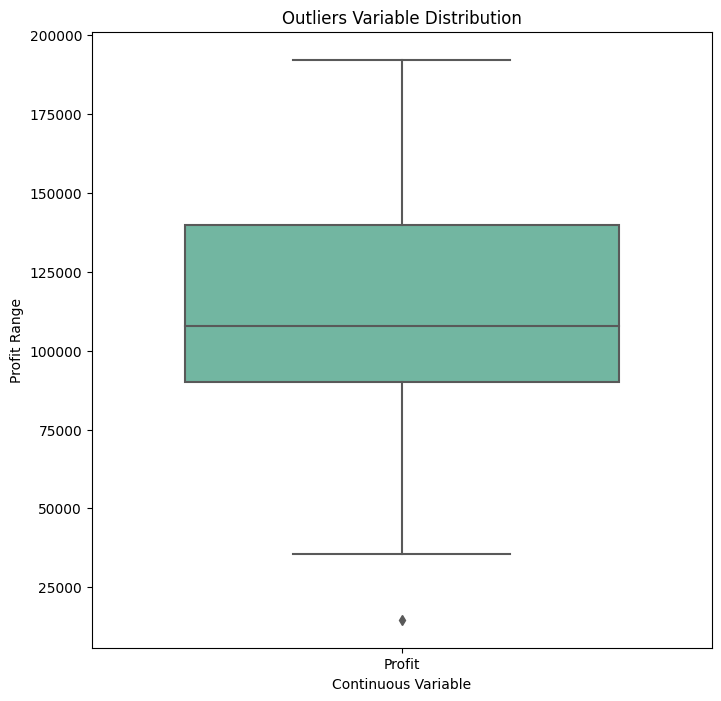

In [ ]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7)

plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()


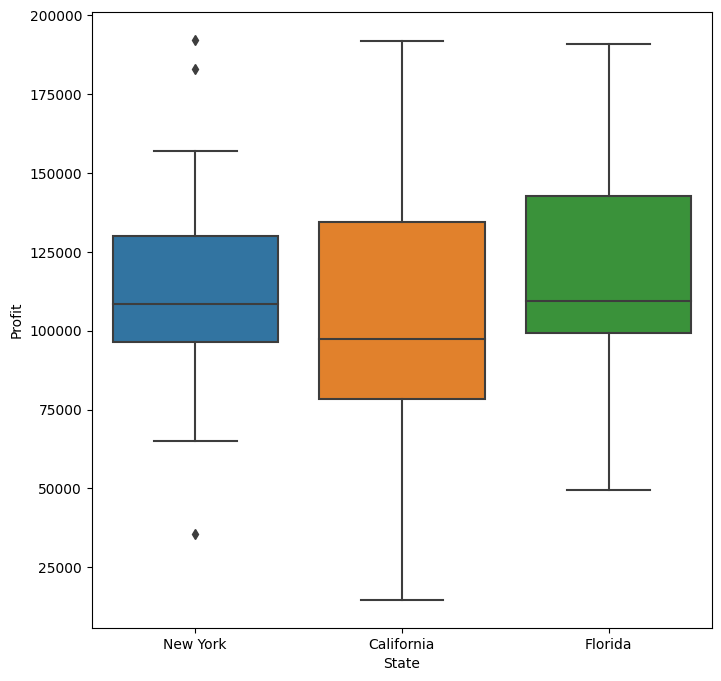

In [ ]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

<ipython-input-12-1cf9bcdcae82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Profit'],bins=5,kde=True)


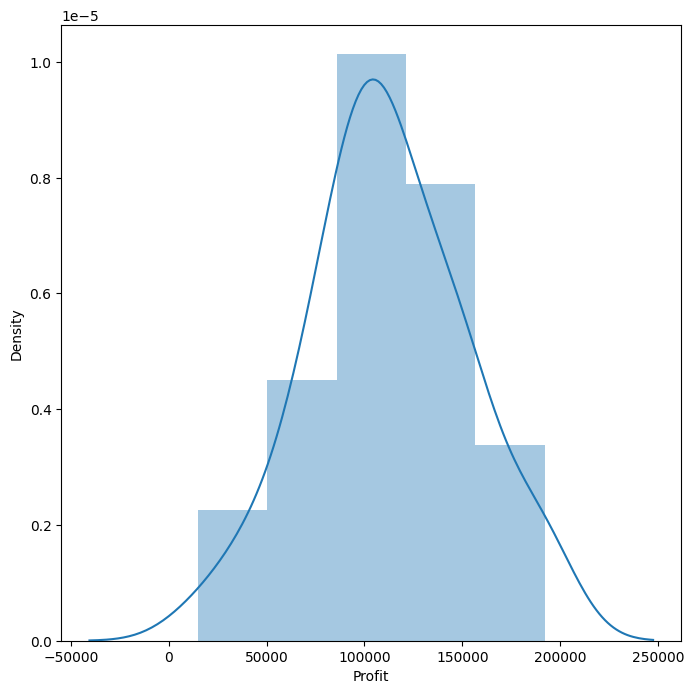

In [ ]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

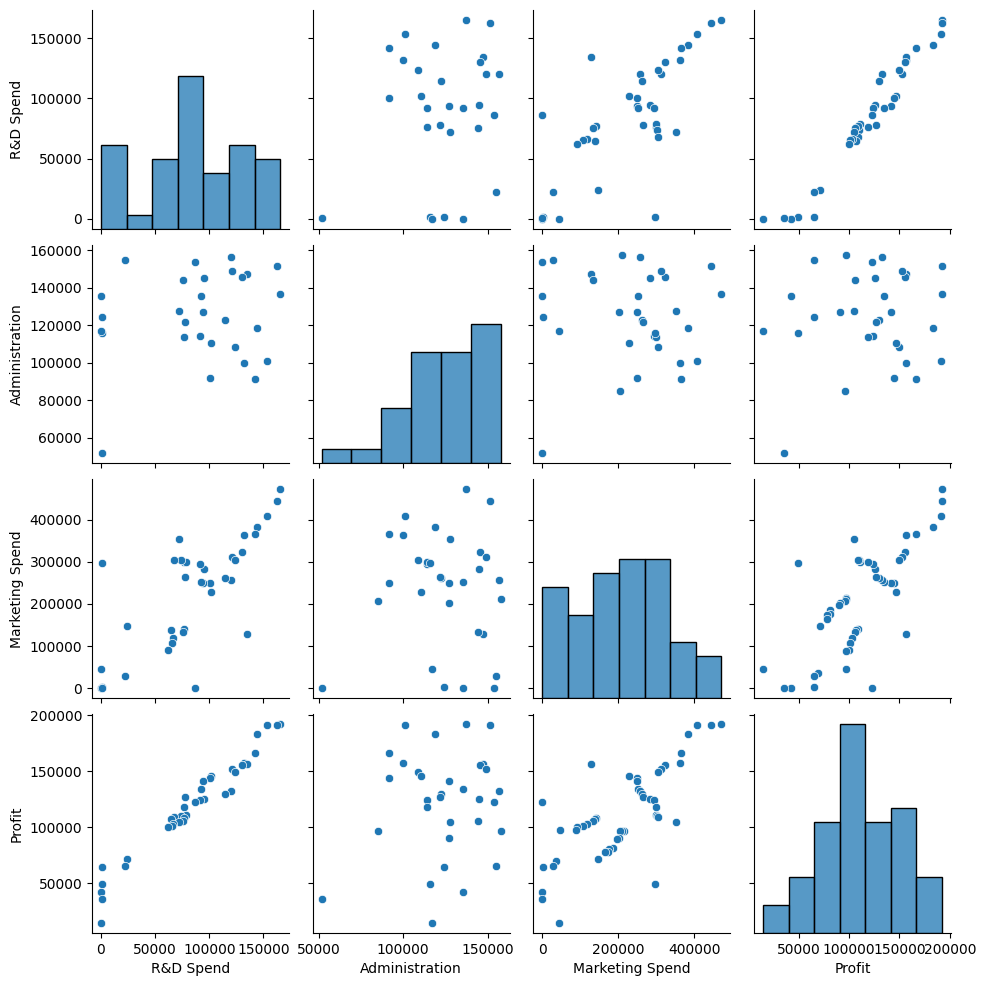

In [ ]:
sns.pairplot(dataset)
plt.show()

model development

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, nan, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, nan, 91131.24, 1],
       [nan, nan, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, nan, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [nan, nan, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, nan, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [nan, nan, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [nan, nan, 197029.42, 0],
       [77044.01, nan, 140574.81, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [67532.53, nan, 304768.73, 1],

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.fit_transform(y_test.reshape(-1, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

ValueError: ignored